# Working with DataFrame.csv File

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import mplfinance as fplt
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Loading Dataset
df = pd.read_csv("datasets/dataset.csv", parse_dates=True)
df.head()

,Type,Date,Time,open,high,low,close,Unnamed: 7
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15,NaN
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05,NaN
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70,NaN
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20,NaN
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45,NaN


In [3]:
df.shape

(22805, 8)

In [4]:
df.isnull().sum()

Type              0
Date              0
Time              0
open              0
high              0
low               0
close             0
Unnamed: 7    22805
dtype: int64

In [5]:
df.drop('Unnamed: 7',axis=1, inplace=True)
df.head()

,Type,Date,Time,open,high,low,close
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45


In [6]:
df.describe()

,Date,open,high,low,close
count,2.280500e+04,22805.000000,22805.000000,22805.000000,22805.000000
mean,2.021022e+07,14703.322396,14707.486481,14699.102201,14703.260816
std,8.285616e+01,391.377498,391.265231,391.551643,391.366248
min,2.021010e+07,13604.750000,13614.400000,13596.750000,13602.800000
25%,2.021012e+07,14462.250000,14465.950000,14458.050000,14461.950000
50%,2.021022e+07,14739.500000,14743.000000,14735.850000,14739.450000
75%,2.021031e+07,15037.000000,15041.250000,15032.500000,15036.850000
max,2.021033e+07,15429.500000,15431.750000,15427.900000,15430.200000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    22805 non-null  object 
 1   Date    22805 non-null  int64  
 2   Time    22805 non-null  object 
 3   open    22805 non-null  float64
 4   high    22805 non-null  float64
 5   low     22805 non-null  float64
 6   close   22805 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [8]:
df.isnull().sum()

Type     0
Date     0
Time     0
open     0
high     0
low      0
close    0
dtype: int64

In [9]:
#converting date column to datetime datatype and adding this as a new column
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [10]:
df.head()

,Type,Date,Time,open,high,low,close
0,NIFTY,2021-01-01,09:16,13997.90,14020.85,13991.35,14013.15
1,NIFTY,2021-01-01,09:17,14014.85,14018.55,14008.15,14009.05
2,NIFTY,2021-01-01,09:18,14008.05,14013.10,14005.05,14012.70
3,NIFTY,2021-01-01,09:19,14013.65,14019.10,14013.65,14016.20
4,NIFTY,2021-01-01,09:20,14015.45,14017.80,14011.95,14015.45


In [11]:
df["Time"]=pd.to_datetime(df["Time"],format="%H:%M")
df.head()

,Type,Date,Time,open,high,low,close
0,NIFTY,2021-01-01,1900-01-01 09:16:00,13997.90,14020.85,13991.35,14013.15
1,NIFTY,2021-01-01,1900-01-01 09:17:00,14014.85,14018.55,14008.15,14009.05
2,NIFTY,2021-01-01,1900-01-01 09:18:00,14008.05,14013.10,14005.05,14012.70
3,NIFTY,2021-01-01,1900-01-01 09:19:00,14013.65,14019.10,14013.65,14016.20
4,NIFTY,2021-01-01,1900-01-01 09:20:00,14015.45,14017.80,14011.95,14015.45


In [12]:
df.drop('Type', axis=1, inplace=True)
df.head()

,Date,Time,open,high,low,close
0,2021-01-01,1900-01-01 09:16:00,13997.90,14020.85,13991.35,14013.15
1,2021-01-01,1900-01-01 09:17:00,14014.85,14018.55,14008.15,14009.05
2,2021-01-01,1900-01-01 09:18:00,14008.05,14013.10,14005.05,14012.70
3,2021-01-01,1900-01-01 09:19:00,14013.65,14019.10,14013.65,14016.20
4,2021-01-01,1900-01-01 09:20:00,14015.45,14017.80,14011.95,14015.45


In [13]:
days_mapped = {'week_day': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday':5, 'Saturday':6, 'Sunday':7}}

In [14]:
df['week_day'] = df['Date'].dt.day_name()
df.replace(days_mapped, inplace=True)

In [15]:
df['+ve/-ve'] = (df['open']-df['close']>0)
df['+ve/-ve'].replace(False,"1",inplace=True)
df['+ve/-ve'].replace(True,"0",inplace=True)
df['+ve/-ve']=df['+ve/-ve'].astype(int)
df.head()

,Date,Time,open,high,low,close,week_day,+ve/-ve
0,2021-01-01,1900-01-01 09:16:00,13997.90,14020.85,13991.35,14013.15,5,1
1,2021-01-01,1900-01-01 09:17:00,14014.85,14018.55,14008.15,14009.05,5,0
2,2021-01-01,1900-01-01 09:18:00,14008.05,14013.10,14005.05,14012.70,5,1
3,2021-01-01,1900-01-01 09:19:00,14013.65,14019.10,14013.65,14016.20,5,1
4,2021-01-01,1900-01-01 09:20:00,14015.45,14017.80,14011.95,14015.45,5,1


In [16]:
df['%(profit/loss)'] = (df['close']-df['open'])/df['open']
df.head()

,Date,Time,open,high,low,close,week_day,+ve/-ve,%(profit/loss)
0,2021-01-01,1900-01-01 09:16:00,13997.90,14020.85,13991.35,14013.15,5,1,0.001089
1,2021-01-01,1900-01-01 09:17:00,14014.85,14018.55,14008.15,14009.05,5,0,-0.000414
2,2021-01-01,1900-01-01 09:18:00,14008.05,14013.10,14005.05,14012.70,5,1,0.000332
3,2021-01-01,1900-01-01 09:19:00,14013.65,14019.10,14013.65,14016.20,5,1,0.000182
4,2021-01-01,1900-01-01 09:20:00,14015.45,14017.80,14011.95,14015.45,5,1,0.000000


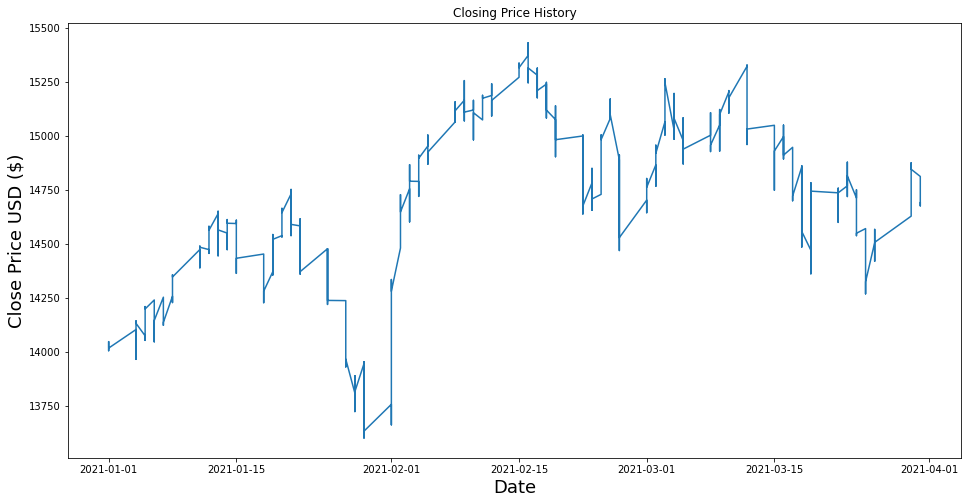

In [17]:
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(df['Date'],df['close'])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

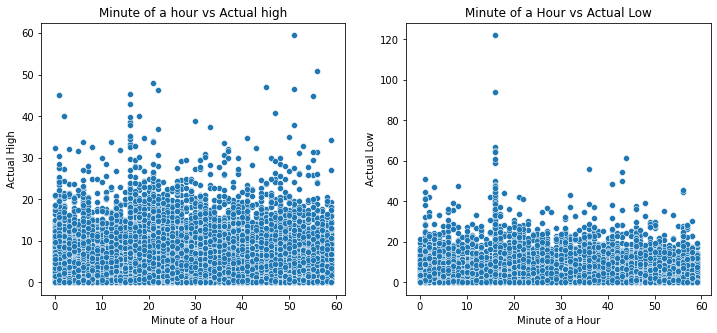

In [18]:
#plotting subplots
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

s1=sns.scatterplot(ax=ax1,x=df["Time"].dt.minute,y=df["high"]-df["open"])
ax1.set_title("Minute of a hour vs Actual high")
ax1.set_xlabel("Minute of a Hour")
ax1.set_ylabel("Actual High")

s2=sns.scatterplot(ax=ax2,x=df["Time"].dt.minute,y=df["open"]-df["low"])
ax2.set_title("Minute of a Hour vs Actual Low")
ax2.set_xlabel("Minute of a Hour")
ax2.set_ylabel("Actual Low")

plt.show()

In [19]:
# Divide into X and y
X=df[["open","high","low"]]
y=df["+ve/-ve"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.4302422269238141

In [21]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.44713175, 0.41005751, 0.44382136, 0.4353319 , 0.40962267])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

def finding_best_model(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'svm': {
            'model': SVC(),
            'params': {
                'kernel' : ['linear','poly', 'rbf']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

finding_best_model(X,y)